# 1. Importing Dependencies

In [160]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import pickle
from sklearn.metrics import precision_recall_fscore_support as score



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE

# 2. Loading the Data set


In [44]:
df = pd.read_csv('train.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning:

Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.



In [45]:
#setting display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('axes', titlesize=15)

In [46]:
# To center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 3. EDA and Data Wrangling

### 3.1 Understanding The Data

In [47]:
df.shape

(100000, 28)

In [48]:
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [49]:
df.tail()

ID Customer_ID   Month   Name Age          SSN Occupation  \
99995  0x25fe9  CUS_0x942c   April  Nicks  25  078-73-5990   Mechanic   
99996  0x25fea  CUS_0x942c     May  Nicks  25  078-73-5990   Mechanic   
99997  0x25feb  CUS_0x942c    June  Nicks  25  078-73-5990   Mechanic   
99998  0x25fec  CUS_0x942c    July  Nicks  25  078-73-5990   Mechanic   
99999  0x25fed  CUS_0x942c  August  Nicks  25  078-73-5990   Mechanic   

      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
99995      39628.99            3359.415833                  4   
99996      39628.99            3359.415833                  4   
99997      39628.99            3359.415833                  4   
99998      39628.99            3359.415833                  4   
99999     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                      Type_of_Loan  Delay_from_due_date  \
99995  Auto Loan, and Student Loan                   23   
99996  Auto Loan, and Student Loan                   18   
99997  Auto Loan, and Student Loan                   27   
99998  Auto Loan, and Student Loan                   20   
99999  Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
99995                      7                 11.5                   3.0   
99996                      7                 11.5                   3.0   
99997                      6                 11.5                   3.0   
99998                    NaN                 11.5                   3.0   
99999                      6                 11.5                   3.0   

      Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
99995          _           502.38                 34.663572   
99996          _           502.38                 40.565631   
99997       Good           502.38                 41.255522   
99998       Good           502.38                 33.638208   
99999       Good           502.38                 34.192463   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
99995   31 Years and 6 Months                    No            35.104023   
99996   31 Years and 7 Months                    No            35.104023   
99997   31 Years and 8 Months                    No            35.104023   
99998   31 Years and 9 Months                    No            35.104023   
99999  31 Years and 10 Months                    No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
99995       60.97133255718485   High_spent_Large_value_payments   
99996       54.18595028760385  High_spent_Medium_value_payments   
99997       24.02847744864441   High_spent_Large_value_payments   
99998      251.67258219721603    Low_spent_Large_value_payments   
99999       167.1638651610451                            !@9#%8   

      Monthly_Balance Credit_Score  
99995      479.866228         Poor  
99996       496.65161         Poor  
99997      516.809083         Poor  
99998      319.164979     Standard  
99999      393.673696         Poor

Note : ID, Customer_ID, SSN can be considered redundant since each of them represents a unique value. We will remove
two out of the three and keep only SSN. Name column will be removed as well due to its non relevance. 

In [50]:
df.drop(['ID','Customer_ID','Name'],axis=1,inplace=True)

In [51]:
df.dtypes

Month                        object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

Note : Categorical features exists hence encoding will be needed for selected

Note: From the above first few rows we can see some features which has numerical values are having the categorical form. So, we will try converting them to Numerical.

In [52]:
# Converting Necessary categorical columns to Numerical

In [53]:
df['Age'] = df['Age'].map(lambda x: re.sub(r'[_-]','',x))
df['Age'] = df['Age'].astype(float)

In [54]:
df['Annual_Income'] = df['Annual_Income'].map(lambda x: re.sub(r'[_-]','',x))
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [55]:
df['Num_of_Loan'] = df['Num_of_Loan'].map(lambda x: re.sub(r'[_-]','',x))
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)

In [56]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].map(lambda x: re.sub(r'[_-]','',str(x)))
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].map(lambda x: re.sub(r'','0',str(x)))
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [57]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].map(lambda x: re.sub(r'[_-]','',str(x)))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [58]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].map(lambda x: re.sub(r'[_-]','',str(x)))
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [59]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].map(lambda x: re.sub(r'[_-]','',str(x)))
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [60]:
df['Monthly_Balance'] = df['Monthly_Balance'].map(lambda x: re.sub(r'[_-]','',str(x)))
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [61]:
df.to_csv('forDashboard.csv')

In [62]:
# Dropping Ages that are higher than 100
# df = df[(df['Age'])<100]

In [63]:
df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05           84998.000000      100000.000000   
mean      119.509700   1.764157e+05            4194.170850          17.091280   
std       684.757313   1.429618e+06            3183.686167         117.404834   
min        14.000000   7.005930e+03             303.645417          -1.000000   
25%        25.000000   1.945750e+04            1625.568229           3.000000   
50%        34.000000   3.757861e+04            3093.745000           6.000000   
75%        42.000000   7.279092e+04            5957.448333           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040      10.761960            21.068780   
std          129.05741     466.422621      61.789933            14.860104   
min            0.00000       1.000000       0.000000            -5.000000   
25%            4.00000       8.000000       2.000000            10.000000   
50%            5.00000      13.000000       3.000000            18.000000   
75%            7.00000      20.000000       6.000000            28.000000   
max         1499.00000    5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            92998.000000         100000.000000          98035.000000   
mean                30.946268            576.858999             27.754251   
std                226.028754            644.688331            193.177339   
min                  0.000000              0.000000              0.000000   
25%                  9.000000             40.090900              3.000000   
50%                 14.000000             90.020500              6.000000   
75%                 18.000000           1040.060600              9.000000   
max               4397.000000           3060.090700           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count     100000.000000             100000.000000        100000.000000   
mean        1426.220376                 32.285173          1403.118217   
std         1155.129026                  5.116875          8306.041270   
min            0.230000                 20.000000             0.000000   
25%          566.072500                 28.052567            30.306660   
50%         1166.155000                 32.305784            69.249473   
75%         1945.962500                 36.496663           161.224249   
max         4998.070000                 50.000000         82331.000000   

       Amount_invested_monthly  Monthly_Balance  
count             95521.000000     9.880000e+04  
mean                637.412998     3.036437e+22  
std                2043.319327     3.181295e+24  
min                   0.000000     7.759665e-03  
25%                  74.534002     2.701145e+02  
50%                 135.925682     3.367423e+02  
75%                 265.731733     4.703321e+02  
max               10000.000000     3.333333e+26

In [64]:
# Trying to understand more about the target variable
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

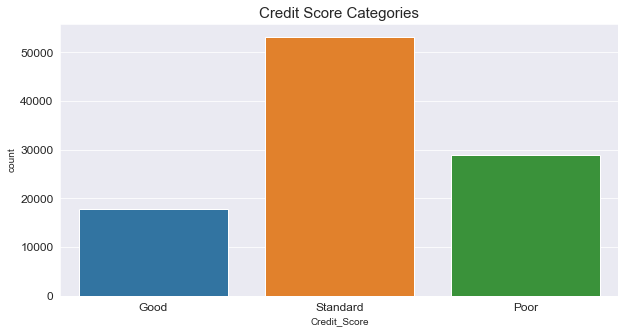

In [65]:
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style('darkgrid')
sns.countplot(data = df, x=df["Credit_Score"])
plt.title("Credit Score Categories")
plt.show()

In [66]:
#Plotly
fig = px.histogram(df, x="Credit_Score",color='Credit_Score')
fig.show()

Note : Credit score of 'Standard' has higher number of values compared to other two making this an inbalanced feature. 
We can undersample to make the ratios equal but to observe the initial accuracies, we will not undersample and proceed as it is.

### 3.2 Checking for Missing Values

In [67]:
#Checking for null value percentage with respect to total entries
round(df.isnull().mean()*100,0)

Month                        0.0
Age                          0.0
SSN                          0.0
Occupation                   0.0
Annual_Income                0.0
Monthly_Inhand_Salary       15.0
Num_Bank_Accounts            0.0
Num_Credit_Card              0.0
Interest_Rate                0.0
Num_of_Loan                  0.0
Type_of_Loan                11.0
Delay_from_due_date          0.0
Num_of_Delayed_Payment       7.0
Changed_Credit_Limit         0.0
Num_Credit_Inquiries         2.0
Credit_Mix                   0.0
Outstanding_Debt             0.0
Credit_Utilization_Ratio     0.0
Credit_History_Age           9.0
Payment_of_Min_Amount        0.0
Total_EMI_per_month          0.0
Amount_invested_monthly      4.0
Payment_Behaviour            0.0
Monthly_Balance              1.0
Credit_Score                 0.0
dtype: float64

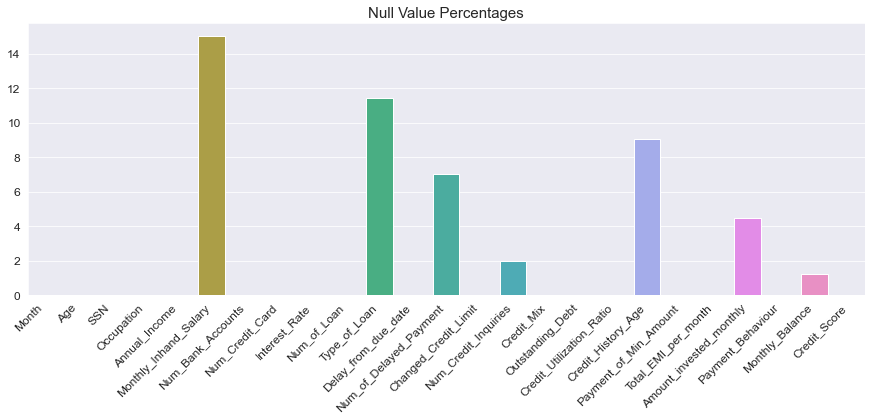

In [68]:
x = df.isnull().mean()*100

plt.rcParams["figure.figsize"] = (15,5)

plt.xticks(rotation=45, ha='right')
plt.title("Null Value Percentages")
sns.set_style("darkgrid")
sns.barplot(x = df.columns , y=x)
plt.show()

In [69]:
#Plotly
x = df.isnull().mean()*100
fig = px.bar(x=df.columns, y=x,color=df.columns, 
             labels=dict(x="Feature", y="Null Value Percentage"))
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.show()

Note: Since some of the columns will be dropped due to correlation, we will deal with the missing values in a latter stage.

# 4. Plotting

### 4.1 Numerical Columns

In [70]:
# Getting the Numerical Features
df._get_numeric_data().columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

#### 4.1.1. Understanding the Distributions of Features

##### 4.1.1.1. Histogram

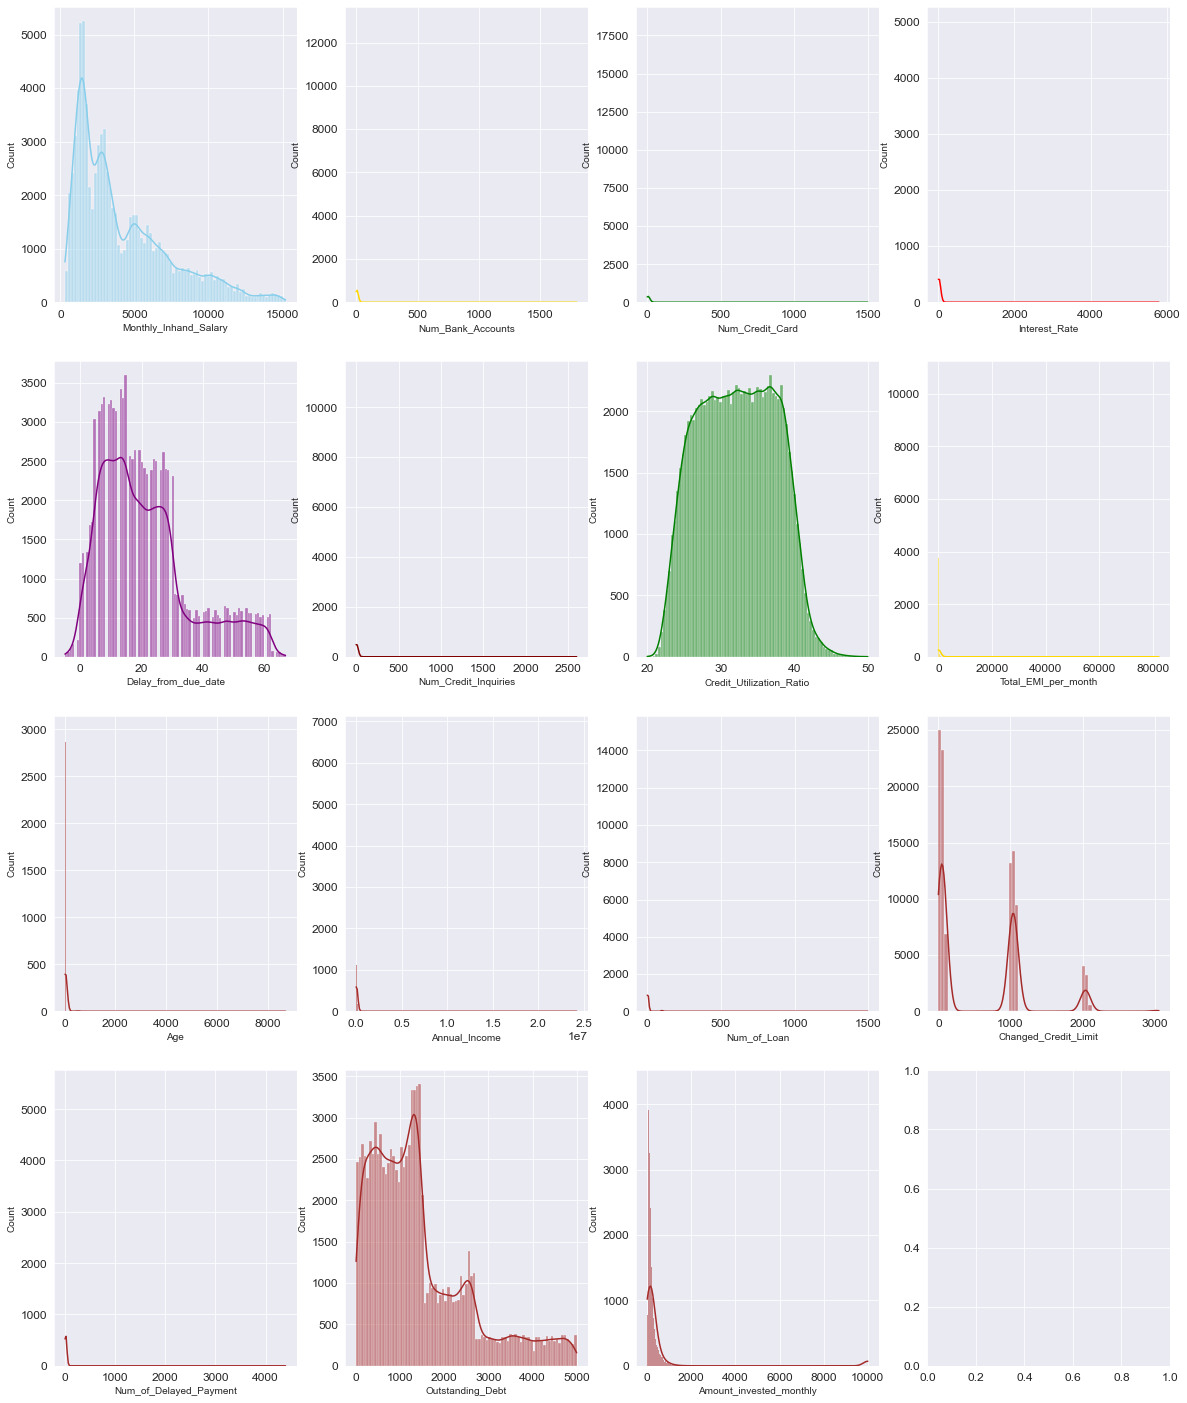

In [164]:
#For all Numerical Features
# fig, axs = plt.subplots(8, 2, figsize=(30, 30))

# sns.histplot(data=df, x="Monthly_Inhand_Salary", kde=True, color="skyblue", ax=axs[0,0])
# sns.histplot(data=df, x="Num_Bank_Accounts", kde=True, color="gold", ax=axs[0,1],bins=5)
# sns.histplot(data=df, x="Num_Credit_Card", kde=True, color="Green", ax=axs[1,0])
# sns.histplot(data=df, x="Interest_Rate", kde=True, color="red", ax=axs[1,1])
# sns.histplot(data=df, x="Delay_from_due_date", kde=True, color="purple", ax=axs[2,0])
# sns.histplot(data=df, x="Num_Credit_Inquiries", kde=True, color="maroon", ax=axs[2,1])
# sns.histplot(data=df, x="Credit_Utilization_Ratio", kde=True, color="Green", ax=axs[3,0])
# sns.histplot(data=df, x="Total_EMI_per_month", kde=True, color="gold", ax=axs[3,1])
# sns.histplot(data=df, x="Age", kde=True, color="brown", ax=axs[4,0])

# sns.histplot(data=df, x="Annual_Income", kde=True, color="brown", ax=axs[4,1])
# sns.histplot(data=df, x="Num_of_Loan", kde=True, color="brown", ax=axs[5,0])
# sns.histplot(data=df, x="Changed_Credit_Limit", kde=True, color="brown", ax=axs[5,1])
# sns.histplot(data=df, x="Num_of_Delayed_Payment", kde=True, color="brown", ax=axs[6,0])
# sns.histplot(data=df, x="Outstanding_Debt", kde=True, color="brown", ax=axs[6,1])
# sns.histplot(data=df, x="Amount_invested_monthly", kde=True, color="brown", ax=axs[7,0])
# sns.histplot(data=df, x="Monthly_Balance", kde=True, color="brown", ax=axs[7,1])

fig, axs = plt.subplots(4, 4, figsize=(20, 25))

sns.histplot(data=df, x="Monthly_Inhand_Salary", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="Num_Bank_Accounts", kde=True, color="gold", ax=axs[0,1])
sns.histplot(data=df, x="Num_Credit_Card", kde=True, color="Green", ax=axs[0,2])
sns.histplot(data=df, x="Interest_Rate", kde=True, color="red", ax=axs[0,3])
sns.histplot(data=df, x="Delay_from_due_date", kde=True, color="purple", ax=axs[1,0])
sns.histplot(data=df, x="Num_Credit_Inquiries", kde=True, color="maroon", ax=axs[1,1])
sns.histplot(data=df, x="Credit_Utilization_Ratio", kde=True, color="Green", ax=axs[1,2])
sns.histplot(data=df, x="Total_EMI_per_month", kde=True, color="gold", ax=axs[1,3])
sns.histplot(data=df, x="Age", kde=True, color="brown", ax=axs[2,0])

sns.histplot(data=df, x="Annual_Income", kde=True, color="brown", ax=axs[2,1])
sns.histplot(data=df, x="Num_of_Loan", kde=True, color="brown", ax=axs[2,2])
sns.histplot(data=df, x="", kde=True, color="brown", ax=axs[2,3])
sns.histplot(data=df, x="Num_of_Delayed_Payment", kde=True, color="brown", ax=axs[3,0])
sns.histplot(data=df, x="v", kde=True, color="brown", ax=axs[3,1])
sns.histplot(data=df, x="Amount_invested_monthly", kde=True, color="brown", ax=axs[3,2])
# sns.histplot(data=df, x="Monthly_Balance", kde=True, color="brown", ax=axs[3,3])

plt.show()

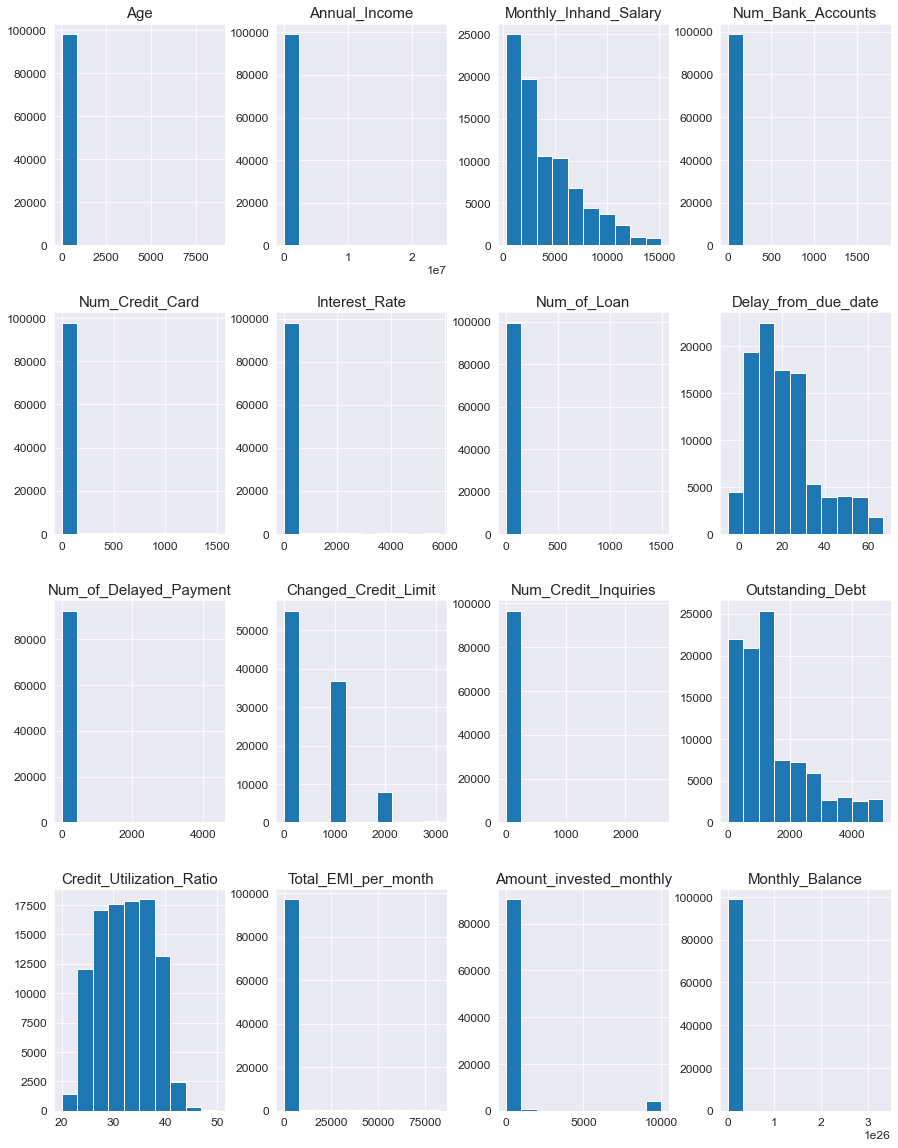

In [71]:
df.hist(figsize=(15, 20))
plt.show()

In [72]:
# px.histogram(df['Age'],nbins=5)

Note: We can clearly see that there are many outliers in below features.

1. Num_Bank_Accounts
2. Num_Credit_Card
3. Interest_Rate
4. Num_Credit_Inquiries
5. Total_EMI_per_month

These will be dealth seperately and also the features that are skewed will be log transformed as well.

Text(0.5, 1.0, 'Monthly Inhand Salary by Credit Score')

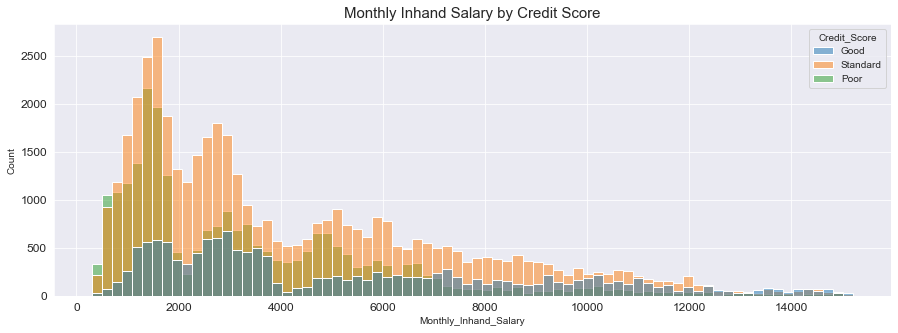

In [73]:
# To understand more on Salary and Credit_Score
sns.histplot(data=df,x=df['Monthly_Inhand_Salary'],hue='Credit_Score')
plt.title('Monthly Inhand Salary by Credit Score')

##### 4.1.1.2. Density Plots

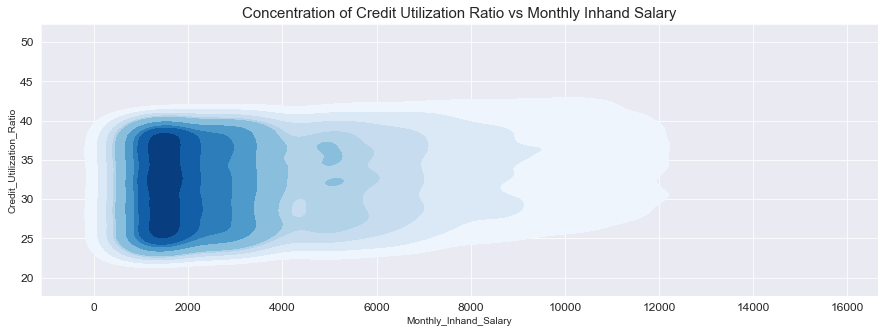

In [74]:
sns.kdeplot(data=df,x=df['Monthly_Inhand_Salary'],y=df['Credit_Utilization_Ratio'],cmap="Blues", shade=True)
plt.title('Concentration of Credit Utilization Ratio vs Monthly Inhand Salary')
plt.show()

#### 4.1.2. Understanding the Relationship between Features

##### 4.1.2.1. Correlogram

In [30]:
sns.pairplot(data=df, hue="Credit_Score")
plt.show()

KeyboardInterrupt: 

Note: We can observe that The Credit Score is clearly seggregated in the Delay_from_due_date feature which implies this feature will have higher significance in predicting the Credit_Score. Other than that no significant correlations can be observed hence we will plot a heatmap with correlation p scores. 

##### 4.1.2.2. Heatmap

In [75]:
corr = df[df._get_numeric_data().columns].corr()
# sns.heatmap(corr, annot=True, fmt=".1f")

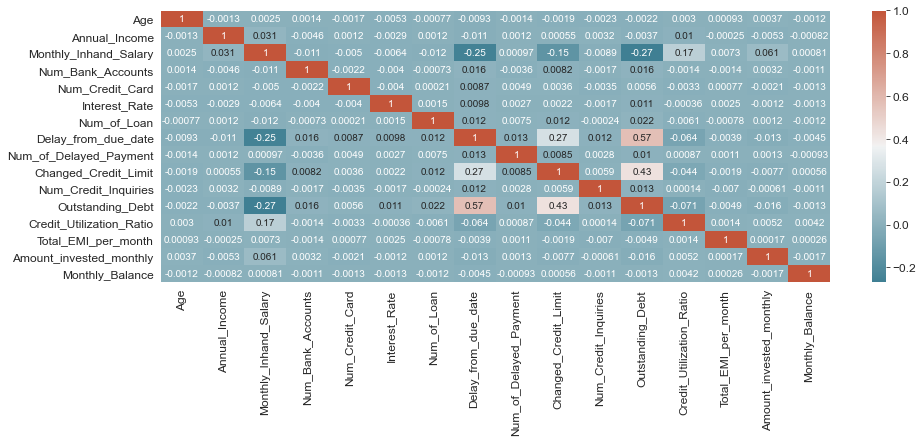

In [76]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [77]:
#Plotly
fig = px.imshow(corr, text_auto=True, aspect="auto",color_continuous_midpoint=0)
fig.show()

Note: We consider the correlation boundary as similar to industrial standard of 0.3 and -0.3. Accordingly, we can see there are correlations between 'Outstanding Debt' and 'Delay from due date' with a 0.57 and between 'Changed Credit Limit' and 'Outstanding Debt' of a 0.44. We can solidify the visualized scatterplots in the correlogram of not having significant correlations.

### 4.2 Categorical Columns

In [78]:
df_catagorical=df.select_dtypes(include='object')

In [79]:
df_catagorical.dtypes

Month                    object
SSN                      object
Occupation               object
Type_of_Loan             object
Credit_Mix               object
Credit_History_Age       object
Payment_of_Min_Amount    object
Payment_Behaviour        object
Credit_Score             object
dtype: object

In [80]:
df_catagorical.head()

Month          SSN Occupation  \
0   January  821-00-0265  Scientist   
1  February  821-00-0265  Scientist   
2     March  821-00-0265  Scientist   
3     April  821-00-0265  Scientist   
4       May  821-00-0265  Scientist   

                                        Type_of_Loan Credit_Mix  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...          _   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...       Good   

      Credit_History_Age Payment_of_Min_Amount  \
0  22 Years and 1 Months                    No   
1                    NaN                    No   
2  22 Years and 3 Months                    No   
3  22 Years and 4 Months                    No   
4  22 Years and 5 Months                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good

##### 4.2.1 Countplots

In [81]:
print('Occupation: ',df_catagorical['Occupation'].nunique())
print('Type_of_Loan: ',df_catagorical['Type_of_Loan'].nunique())
print('Credit_Mix: ',df_catagorical['Credit_Mix'].nunique())
print('Credit_History_Age: ',df_catagorical['Credit_History_Age'].nunique())
print('Payment_of_Min_Amount: ',df_catagorical['Payment_of_Min_Amount'].nunique())
print('Payment_Behaviour: ',df_catagorical['Payment_Behaviour'].nunique())

Occupation:  16
Type_of_Loan:  6260
Credit_Mix:  4
Credit_History_Age:  404
Payment_of_Min_Amount:  3
Payment_Behaviour:  7


Note : We will only be plotting for features that have less than 20 unique values

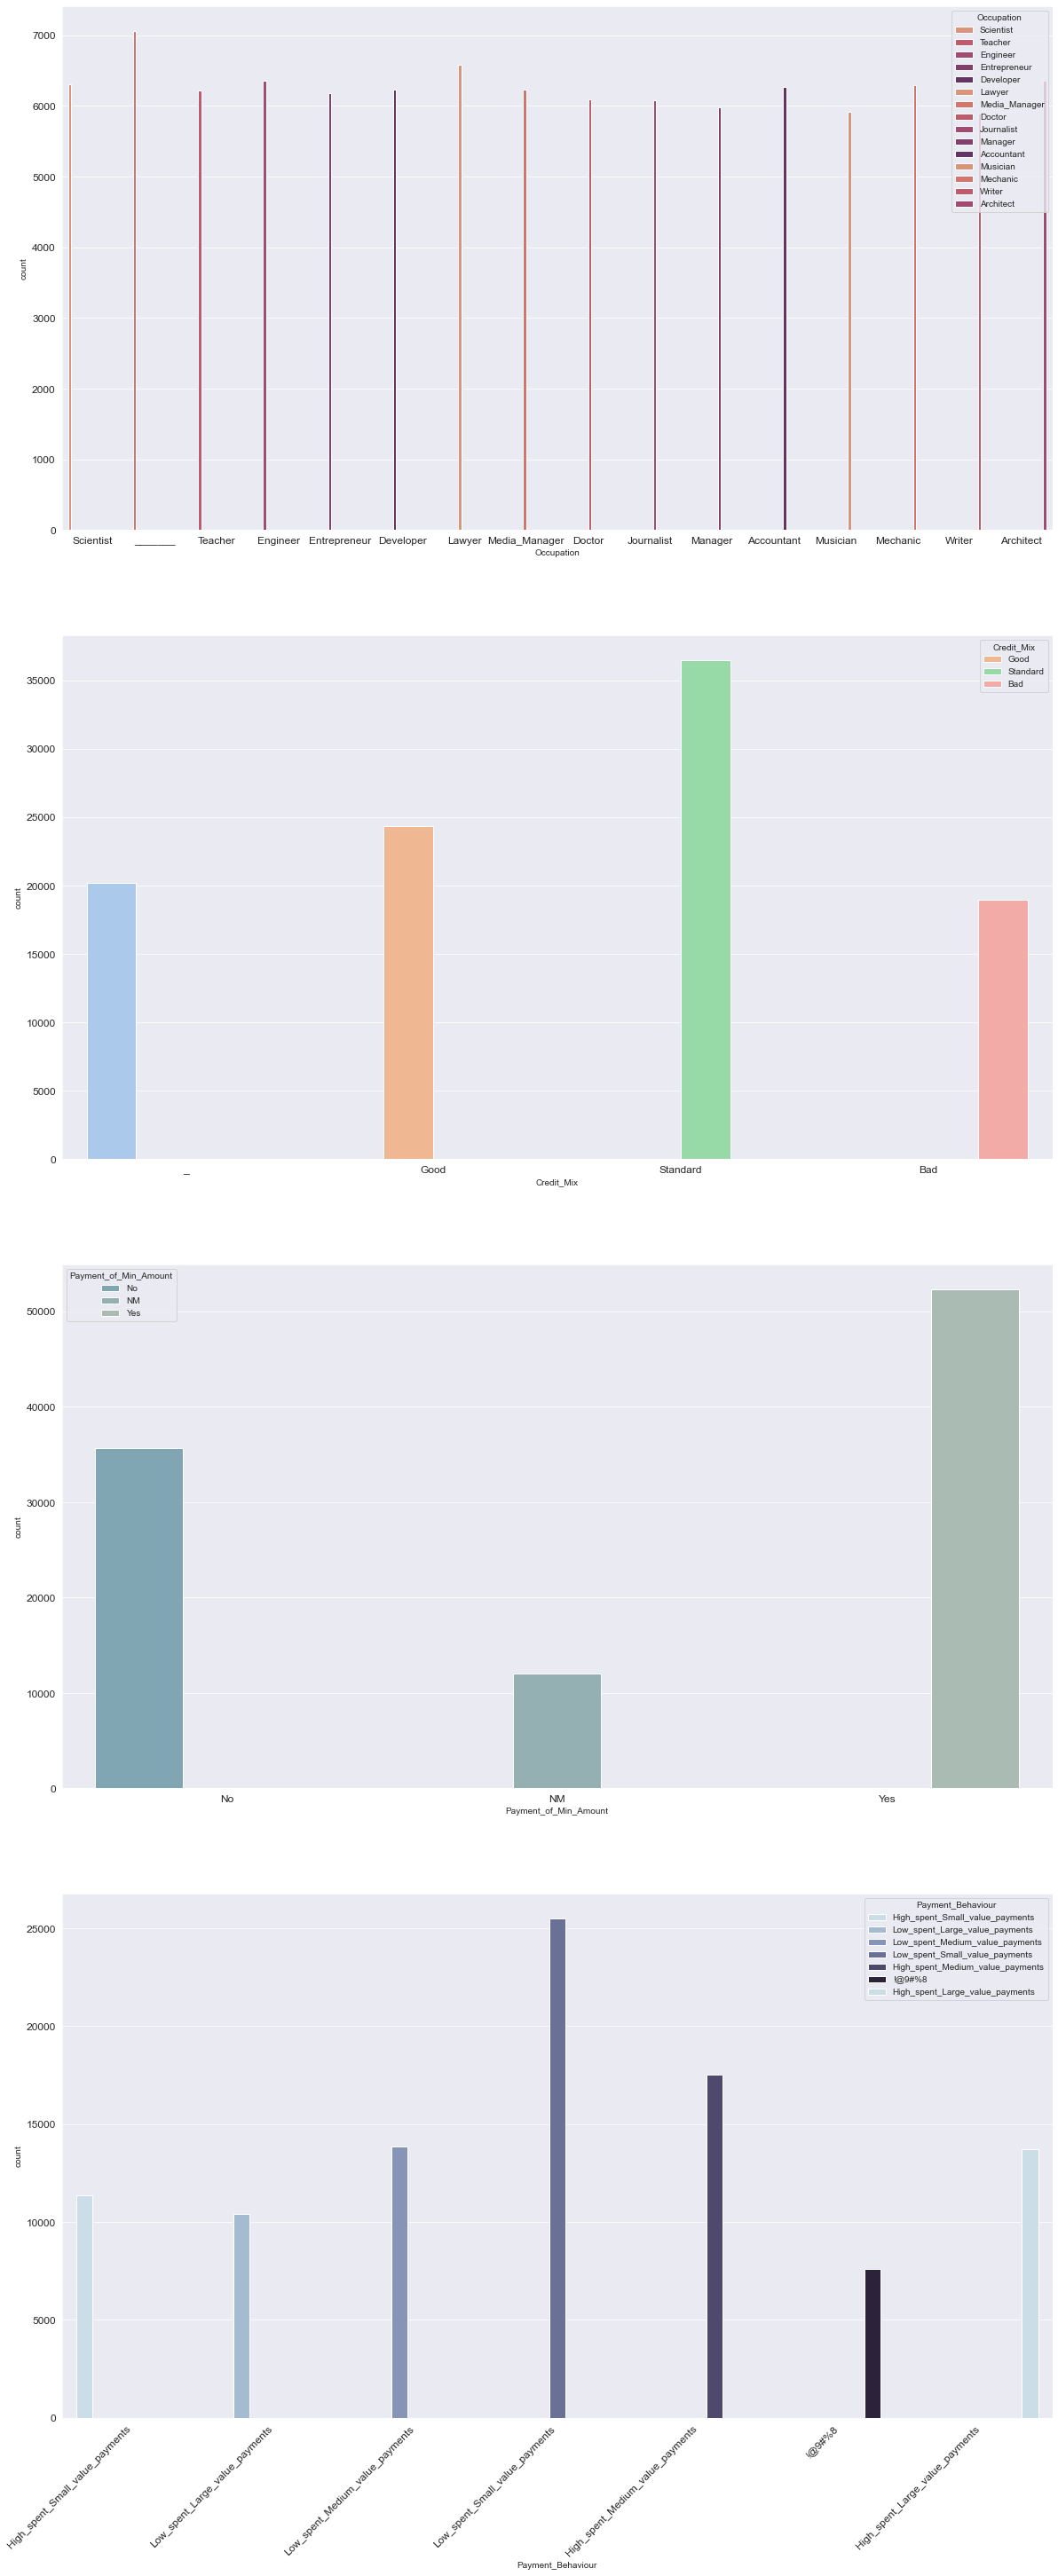

In [82]:
#Countplots
fig, axs = plt.subplots(4, 1, figsize=(20, 50))
plt.xticks(rotation=45, ha='right')
sns.countplot(x=df['Occupation'], ax=axs[0],palette=sns.color_palette("flare"),hue=df['Occupation'])
sns.countplot(x=df['Credit_Mix'], ax=axs[1],palette=sns.color_palette("pastel"),hue=df['Credit_Mix'])
sns.countplot(x=df['Payment_Behaviour'], ax=axs[3],palette=sns.color_palette("ch:s=.25,rot=-.25"),hue=df['Payment_Behaviour'])
sns.countplot(x=df['Payment_of_Min_Amount'],ax=axs[2],palette=sns.color_palette("blend:#7AB,#EDA"),hue=df['Payment_of_Min_Amount'])
plt.xticks(rotation=45, ha='right')

plt.show()


Note: It is clear that we have unwanted data in the categorical feature values. 

### Removing unwated data for categorical columns

In [83]:
# 'Occupation'

In [84]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [85]:
df = df[(df['Occupation']!='_______')]

In [86]:
# 'Credit_Mix'

In [87]:
df['Credit_Mix'].value_counts()

Standard    33916
Good        22618
_           18774
Bad         17630
Name: Credit_Mix, dtype: int64

In [88]:
df = df[(df['Credit_Mix']!='_')]

In [89]:
# 'Payment_Behaviour'

In [90]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      18866
High_spent_Medium_value_payments    13075
Low_spent_Medium_value_payments     10304
High_spent_Large_value_payments     10191
High_spent_Small_value_payments      8341
Low_spent_Large_value_payments       7711
!@9#%8                               5676
Name: Payment_Behaviour, dtype: int64

In [91]:
df = df[(df['Payment_Behaviour']!='!@9#%8')]

In [92]:
# 'Payment_of_Min_Amount'

In [93]:
df['Payment_of_Min_Amount'].value_counts()

Yes    35763
No     24473
NM      8252
Name: Payment_of_Min_Amount, dtype: int64

In [94]:
df = df[(df['Payment_of_Min_Amount']!='NM')]

In [95]:
df.shape

(60236, 25)

##### 4.2.1 Piechart

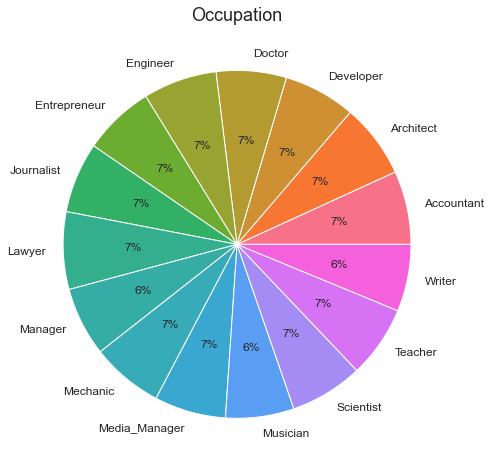

In [96]:
# 'Occupation'

def label_function(val):
#     return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
    return f'{val:.0f}%'

colors1 = sns.color_palette("husl",16)
df.groupby('Occupation').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                  colors=colors1,figsize=(8,8))
plt.title('Occupation',size=18)
plt.ylabel('')
plt.show()

Note : The data seems to be equally segmented among the types of occupations hence the feature is a well balanced feature. 

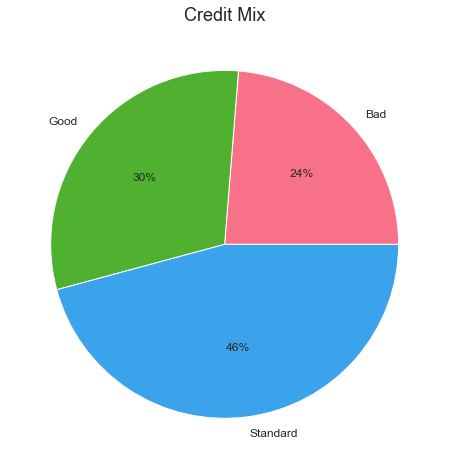

In [97]:
# 'Credit_Mix'
colors1 = sns.color_palette("husl",3)
df.groupby('Credit_Mix').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                  colors=colors1,figsize=(8,8))
plt.title('Credit Mix',size=18)
plt.ylabel('')
plt.show()

In [98]:
df.groupby('Payment_Behaviour').size().index

Index(['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments'],
      dtype='object', name='Payment_Behaviour')

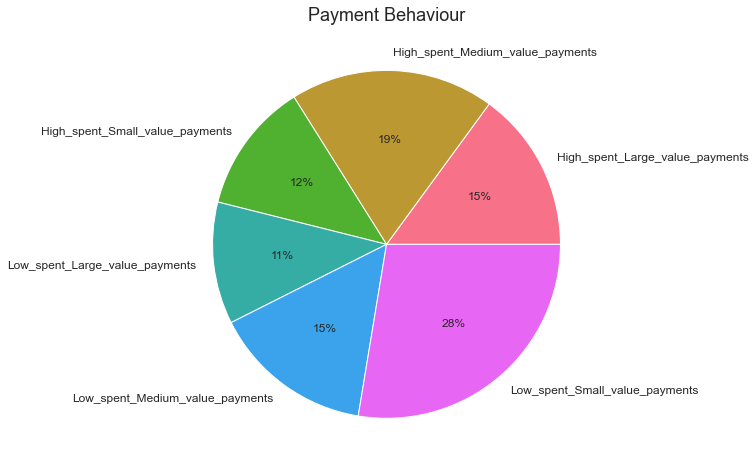

In [99]:
# 'Payment_Behaviour'
colors1 = sns.color_palette("husl",6)
df.groupby('Payment_Behaviour').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                  colors=colors1,figsize=(8,8))
plt.title('Payment Behaviour',size=18)
plt.ylabel('')
plt.show()

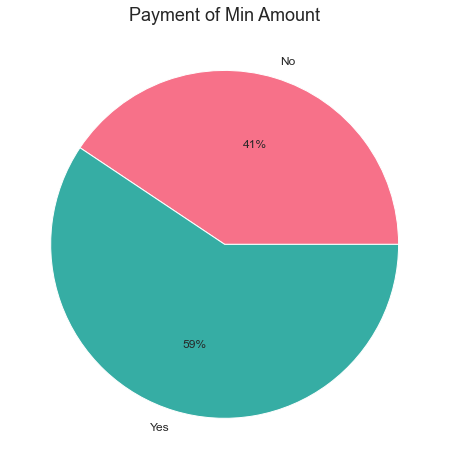

In [100]:
# 'Payment_of_Min_Amount'
colors1 = sns.color_palette("husl",2)
df.groupby('Payment_of_Min_Amount').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                  colors=colors1,figsize=(8,8))
plt.title('Payment of Min Amount',size=18)
plt.ylabel('')
plt.show()

In [101]:
# def label_function(val):
# #     return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
#     return f'{val:.0f}%'

# colors1 = sns.color_palette("husl",16)
# colors2 = sns.color_palette("husl",3)
# colors3 = sns.color_palette("husl",6)
# # colors3 = sns.color_palette('pastel')


# fig,ax = plt.subplots(ncols=2,nrows=2 ,figsize=(25, 20))

# df.groupby('Occupation').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
#                                   colors=colors1, ax=ax[0,0])
# df.groupby('Credit_Mix').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
#                                  colors=colors2, ax=ax[0,1])
# df.groupby('Payment_Behaviour').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
#                                   colors=colors3, ax=ax[1,0])
# df.groupby('Payment_of_Min_Amount').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
#                                  colors=colors2, ax=ax[1,1])

# ax2.set_ylabel('Per gender', size=22)
# plt.tight_layout()
# plt.show()

# 5. Missing Values Treatment

In [102]:
df.head(2)

Month    Age          SSN Occupation  Annual_Income  \
1  February   23.0  821-00-0265  Scientist       19114.12   
2     March  500.0  821-00-0265  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
1                    NaN                  3                4              3   
2                    NaN                  3                4              3   

   Num_of_Loan                                       Type_of_Loan  \
1          4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2          4.0  Auto Loan, Credit-Builder Loan, Personal Loan,...   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
1                   -1                     NaN             1010.0207   
2                    3                     7.0                0.0000   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
1                   4.0       Good            809.98   
2                   4.0       Good            809.98   

   Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
1                 31.944960                    NaN                    No   
2                 28.609352  22 Years and 3 Months                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
1            49.574949               118.280222   
2            49.574949                81.699521   

                 Payment_Behaviour  Monthly_Balance Credit_Score  
1   Low_spent_Large_value_payments       284.629162         Good  
2  Low_spent_Medium_value_payments       331.209863         Good

In [103]:
round(df.isnull().mean()*100,0)

Month                        0.0
Age                          0.0
SSN                          0.0
Occupation                   0.0
Annual_Income                0.0
Monthly_Inhand_Salary       15.0
Num_Bank_Accounts            0.0
Num_Credit_Card              0.0
Interest_Rate                0.0
Num_of_Loan                  0.0
Type_of_Loan                11.0
Delay_from_due_date          0.0
Num_of_Delayed_Payment       7.0
Changed_Credit_Limit         0.0
Num_Credit_Inquiries         2.0
Credit_Mix                   0.0
Outstanding_Debt             0.0
Credit_Utilization_Ratio     0.0
Credit_History_Age           9.0
Payment_of_Min_Amount        0.0
Total_EMI_per_month          0.0
Amount_invested_monthly      5.0
Payment_Behaviour            0.0
Monthly_Balance              1.0
Credit_Score                 0.0
dtype: float64

##### 5.1 Dealing With Missing Values for Numerical Features

We will impute missing values using KNN imputer

In [104]:
from sklearn.impute import KNNImputer

In [105]:
imputer = KNNImputer(n_neighbors=3)

In [106]:
df['Monthly_Inhand_Salary'] = imputer.fit_transform(df[['Monthly_Inhand_Salary']])
df['Num_of_Delayed_Payment'] = imputer.fit_transform(df[['Num_of_Delayed_Payment']])
df['Amount_invested_monthly'] = imputer.fit_transform(df[['Amount_invested_monthly']])
df['Monthly_Balance'] = imputer.fit_transform(df[['Monthly_Balance']])
df['Num_Credit_Inquiries'] = imputer.fit_transform(df[['Monthly_Balance']])

##### 5.1 Dealing With Missing Values for Categorical Features

In [107]:
#Replacing NaN values with Mode for categorical Columns
df['Type_of_Loan'].fillna(df['Type_of_Loan'].value_counts().index[0], inplace=True)
df['Credit_History_Age'].fillna(df['Credit_History_Age'].value_counts().index[0], inplace=True)

In [108]:
round(df.isnull().mean()*100,0)

Month                       0.0
Age                         0.0
SSN                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

# 6. Outlier Detection and Treatment

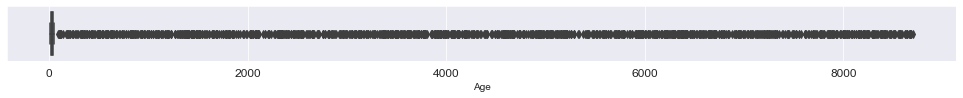

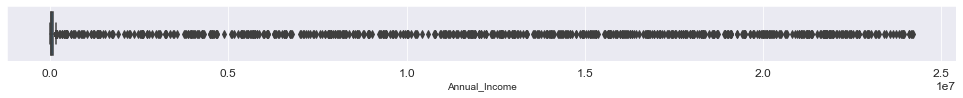

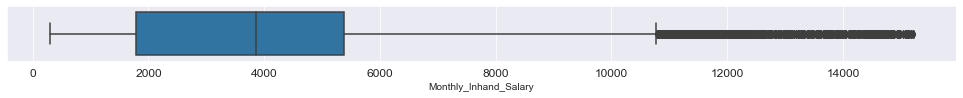

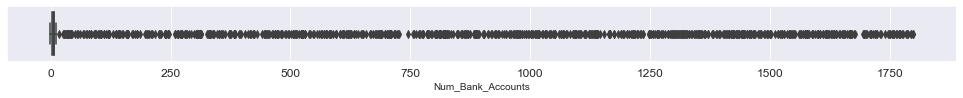

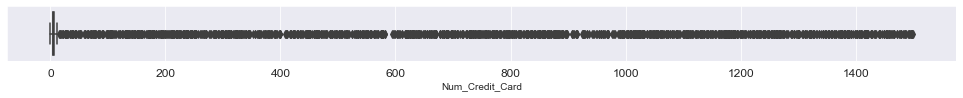

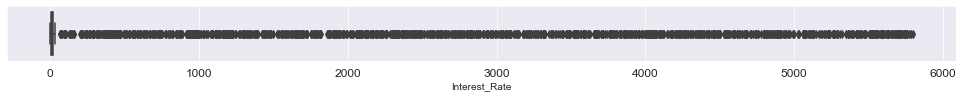

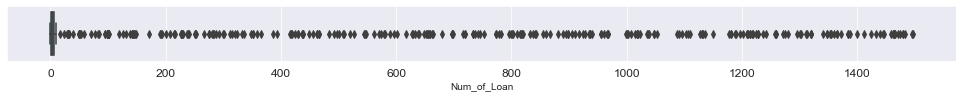

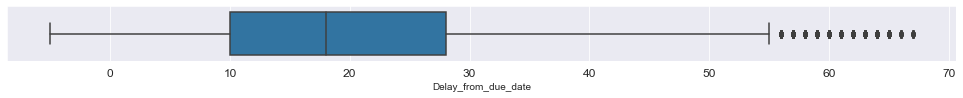

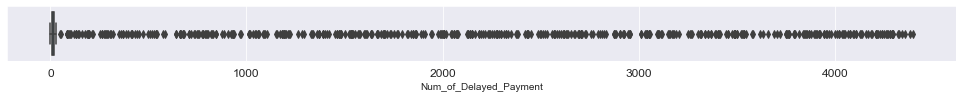

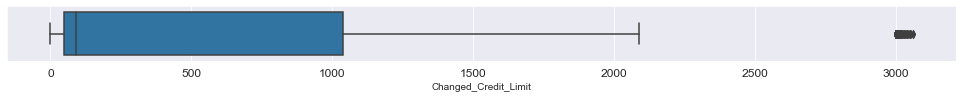

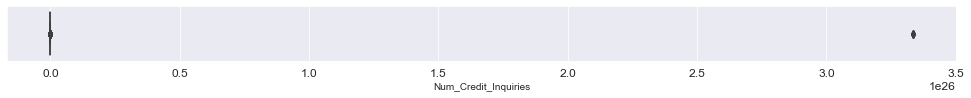

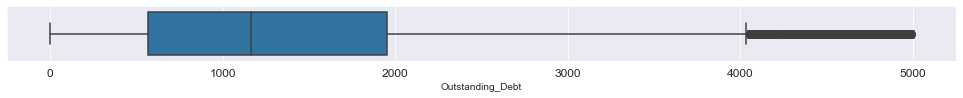

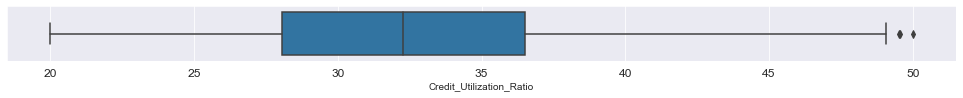

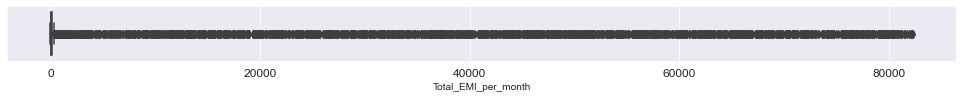

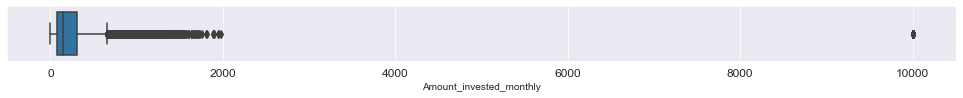

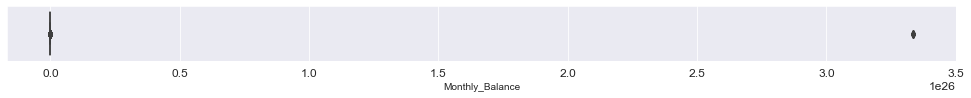

In [109]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
        
numericalCols = df1.columns.tolist()

### Flooring and Capping for Upper and Lower Wisker

Note: Since we have already trimmed significant amount of data considering irrelevant data in categorical features,
we decided to use flooring and capping method for missing value treatment

In [110]:
def flooringAndCapping(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    upper_wisker = q3+(1.5*iqr)
    lower_wisker = q1-(1.5*iqr)

    df[col] = df[col].map(lambda x: upper_wisker if x>upper_wisker else (lower_wisker if x<lower_wisker else x))


In [111]:
numericalCols

for col in numericalCols:
    flooringAndCapping(col)

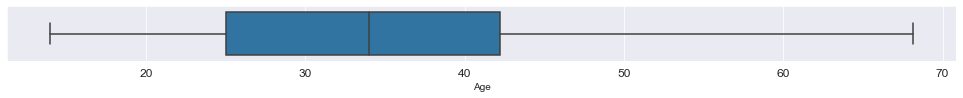

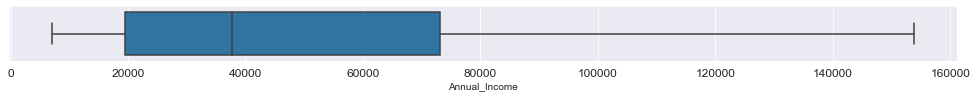

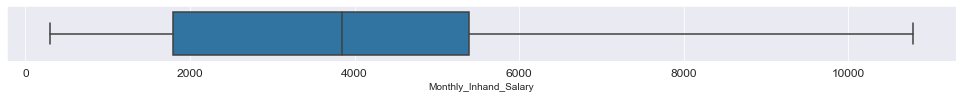

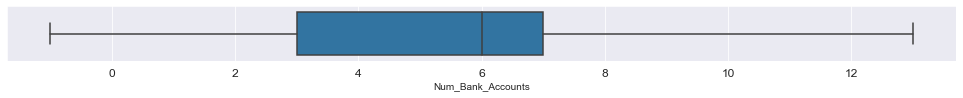

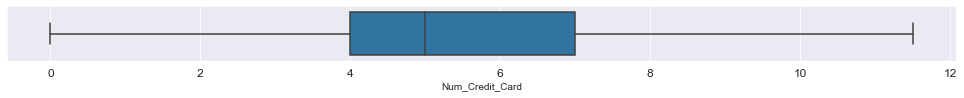

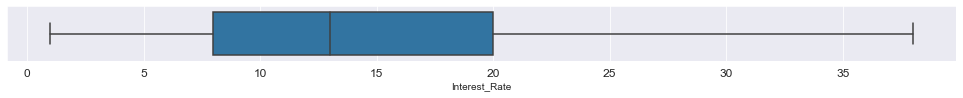

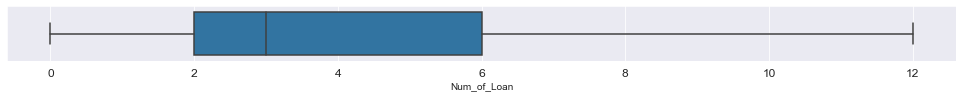

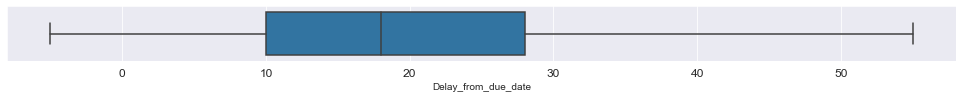

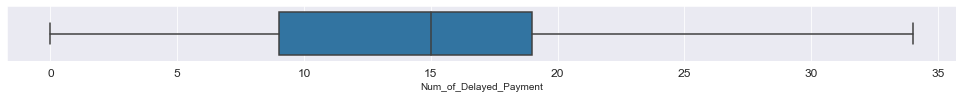

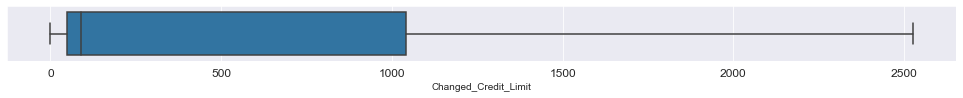

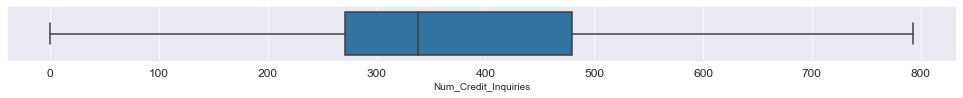

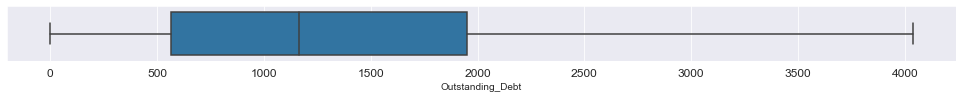

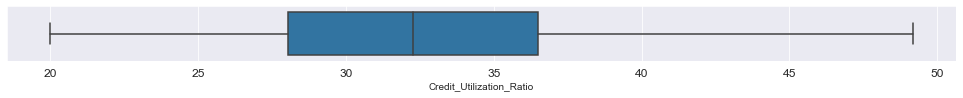

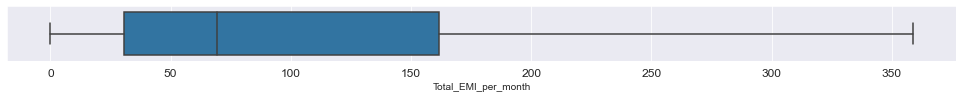

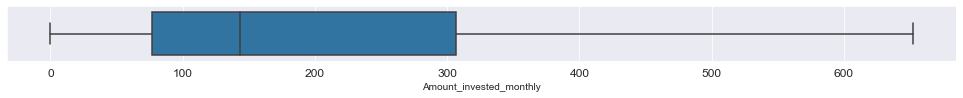

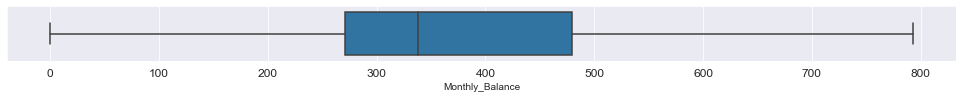

In [112]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

# 7. Encoding for Selected Categorical Features

In [113]:
df_encoded = pd.get_dummies(df[['Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount']], prefix=['Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount'])


In [114]:
dfNew = pd.concat([df[numericalCols], df_encoded,df['Credit_Score']], axis=1)

In [115]:
dfNew.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
1  23.000       19114.12            4194.169690                3.0   
2  68.125       19114.12            4194.169690                3.0   
3  23.000       19114.12            4194.169690                3.0   
4  23.000       19114.12            1824.843333                3.0   
6  23.000       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
1              4.0            3.0          4.0                 -1.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   
6              4.0            3.0          4.0                  3.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
1               30.992828             1010.0207            284.629162   
2                7.000000                0.0000            331.209863   
3                4.000000               60.0207            223.451310   
4               30.992828             1010.0207            341.489231   
6                8.000000             1010.0207            244.565317   

   Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
1            809.98                 31.944960            49.574949   
2            809.98                 28.609352            49.574949   
3            809.98                 31.377862            49.574949   
4            809.98                 24.797347            49.574949   
6            809.98                 22.537593            49.574949   

   Amount_invested_monthly  Monthly_Balance  Occupation_Accountant  \
1               118.280222       284.629162                      0   
2                81.699521       331.209863                      0   
3               199.458074       223.451310                      0   
4                41.420153       341.489231                      0   
6               178.344067       244.565317                      0   

   Occupation_Architect  Occupation_Developer  Occupation_Doctor  \
1                     0                     0                  0   
2                     0                     0                  0   
3                     0                     0                  0   
4                     0                     0                  0   
6                     0                     0                  0   

   Occupation_Engineer  Occupation_Entrepreneur  Occupation_Journalist  \
1                    0                        0                      0   
2                    0                        0                      0   
3                    0                        0                      0   
4                    0                        0                      0   
6                    0                        0                      0   

   Occupation_Lawyer  Occupation_Manager  Occupation_Mechanic  \
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   
6                  0                   0                    0   

   Occupation_Media_Manager  Occupation_Musician  Occupation_Scientist  \
1                         0                    0                     1   
2                         0                    0                     1   
3                         0                    0                     1   
4                         0                    0                     1   
6                         0                    0                     1   

   Occupation_Teacher  Occupation_Writer  Credit_Mix_Bad  Credit_Mix_Good  \
1                   0                  0               0                1   
2                   0            

In [116]:
# Encoding Target Variable

labelencoder = LabelEncoder()

dfNew['Target'] = labelencoder.fit_transform(dfNew['Credit_Score'])
dfNew['Target'].nunique()

3

# 8. Splitting Data for Training and Testing

In [174]:
X = dfNew.drop(['Target','Credit_Score'],axis=1)
y = dfNew['Target']

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [176]:
#Saving the X_test 
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

# 9. Model Fitting

First, we will understand which model to select by calculating the cross validation score.

In [120]:
#Creating a list with the models
models = []
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
# models.append(('SVM',SVC(gamma='auto')))

In [210]:
results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name,cv_results.mean(),cv_results.std()))

LDA: 0.644222 (0.000296)
KNN: 0.591783 (0.000921)
CART: 0.647874 (0.000406)
NB: 0.599841 (0.003798)
RFC: 0.743099 (0.000216)


Note : We can observe that Random Forest Classifier gives a better result compared to others.

### 9.1 Feature Importance

Let's test the feature significance for this algorithm using permutation importance. 

Permutation Importance:

This a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.

In [173]:
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

#Saving the Model
filename = 'RandomForestClassfier.sav'
pickle.dump(model, open(filename, 'wb'))

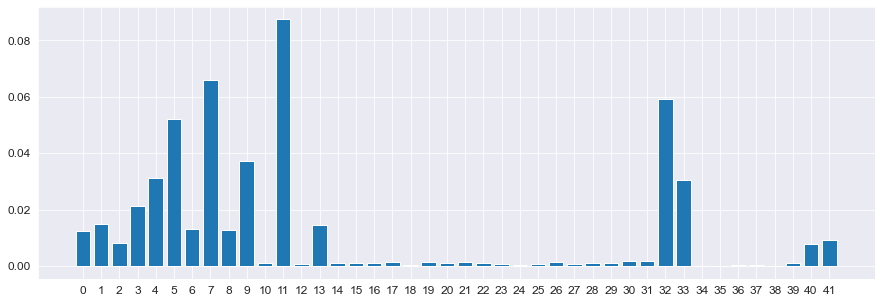

In [161]:
# get importance
imps = permutation_importance(model, X_test, y_test)

importance = imps.importances_mean

# summarize feature importance
# for i,v in enumerate(imps.importances_mean):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)))
plt.show()

Note : From this method, we can select some of the features we have high significance such as features 11,7,5,32 and 33.

In [122]:
# Checking the accuracy for fitted model with all features.

predicted = model.predict(X_test)

accuracy_score(y_test, predicted)

0.7705690948934192

In [123]:
# Checking the accuracy for train set 
predictedTrain = model.predict(X_train)

accuracy_score(y_train, predictedTrain)

1.0

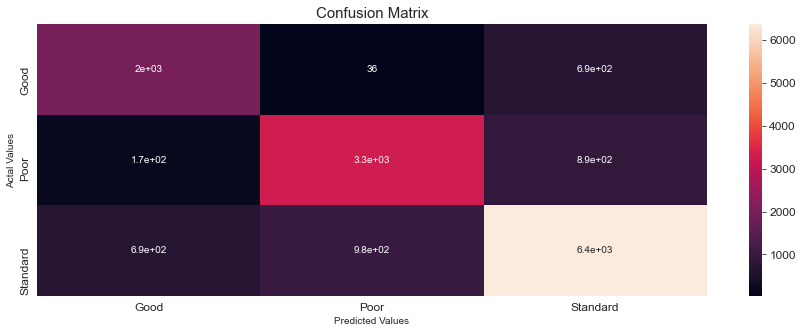

In [124]:


cm = confusion_matrix(y_test, predicted)

cm_df = pd.DataFrame(cm,
                     index = ['Good','Poor','Standard'], 
                     columns = ['Good','Poor','Standard'])
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Note : The model's training accuracy is higher than the testing accuracy which implies that model has overfitted for an extent. But, we will not perform any regularization methods for this project.

### 9.2 Feature Selection - Recursive Feature Elimination

In [125]:
rfe = RFE(model,n_features_to_select=3)
fit = rfe.fit(X_train, y_train)


In [126]:
print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Feature Ranking: [12  1  9 15 11  3 16  4 14  2  5  1  1  8  6 10 36 30 29 33 34 32 39 27
 37 31 35 38 26 28 40 18  7 13 24 21 23 25 22 20 19 17]


In [127]:
predicted = fit.predict(X_test)
accuracy_score(y_test, predicted)

0.65708214356863

Note: Even with 3 features, we could generate an accuracy of 66% which is fairly acceptable.

In [130]:
 print(classification_report(y_test,predicted))  

              precision    recall  f1-score   support

           0       0.56      0.34      0.42      2676
           1       0.68      0.63      0.66      4338
           2       0.66      0.78      0.72      8045

    accuracy                           0.66     15059
   macro avg       0.64      0.58      0.60     15059
weighted avg       0.65      0.66      0.65     15059



In [138]:
precision,recall,fscore,support = score(y_test,predicted,average='macro')

In [156]:
accuracyDict = {
                'Metrics' : ['Precision','Recall','F1-Score'],
                'Values': [precision,recall,fscore]
                }

In [157]:
accuracydf = pd.DataFrame(accuracyDict)

fig = px.bar(accuracydf, x="Metrics", y="Values", barmode="group")
fig.show()

In [162]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

predicted = loaded_model.predict(X_test)

precision,recall,fscore,support = score(y_test,predicted,average='macro')

accuracyDict = {
                'Metrics' : ['Precision','Recall','F1-Score'],
                'Values': [precision,recall,fscore]
                }

accuracydf = pd.DataFrame(accuracyDict)

fig = px.bar(accuracydf, x="Metrics", y="Values", barmode="group")
fig.show()

In [ ]:
dd